In [2]:
import pandas as pd

# Load data
df = pd.read_csv('listings.csv')

# Display basic information
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
# Seattle Airbnb Analysis

## Step 1: Business Understanding

In this analysis, we explore the Seattle Airbnb dataset to answer the following business questions:

1. How do average listing prices vary across neighborhoods in Seattle?
2. What listing features are most correlated with price?
3. Are there seasonal trends in listing availability?

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

# Load the Airbnb dataset
df = pd.read_csv('listings.csv')

# View the shape and column names
print("Shape:", df.shape)
df.head()

Shape: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Overview of data types and missing values
df.info()

# Check for null values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
                                    ... 
jurisdiction_names                     0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
Length: 92, dtype: int64

In [6]:
# Load the dataset
df = pd.read_csv('listings.csv')

# Display first 5 rows
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
# Check dimensions and data types
df.info()

# Basic statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/10208623,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [6]:
# Drop columns that are not useful for analysis
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'description', 'neighborhood_overview', 
                   'picture_url', 'host_id', 'host_name', 'host_picture_url', 'host_thumbnail_url',
                   'calendar_updated', 'calendar_last_scraped', 'license', 'name', 'host_location']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [13]:
# Remove $ and commas, convert to float
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [10]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
                                    ... 
jurisdiction_names                     0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
Length: 77, dtype: int64

In [17]:
# Clean the 'price' column by removing '$' and ',' then converting to float
df['price'] = df['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Fill missing values in numerical columns using median
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

# Fill missing values in categorical columns
df['host_response_time'] = df['host_response_time'].fillna('Unknown')
df['property_type'] = df['property_type'].fillna('Unknown')
df['room_type'] = df['room_type'].fillna('Unknown')
df['bed_type'] = df['bed_type'].fillna('Unknown')

# Drop columns with too many missing values or not useful for analysis
df.drop(columns=['square_feet', 'weekly_price', 'monthly_price'], inplace=True, errors='ignore')

# Optional: Reset index if you've removed rows earlier (not done here, but just in case)
df.reset_index(drop=True, inplace=True)

# Print a quick check of remaining missing values
print(df.isnull().sum())

id                                     0
summary                              177
space                                569
experiences_offered                    0
notes                               1606
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                    627
Length: 73, dtype: int64


In [5]:
df['host_since'] = pd.to_datetime(df['host_since'])

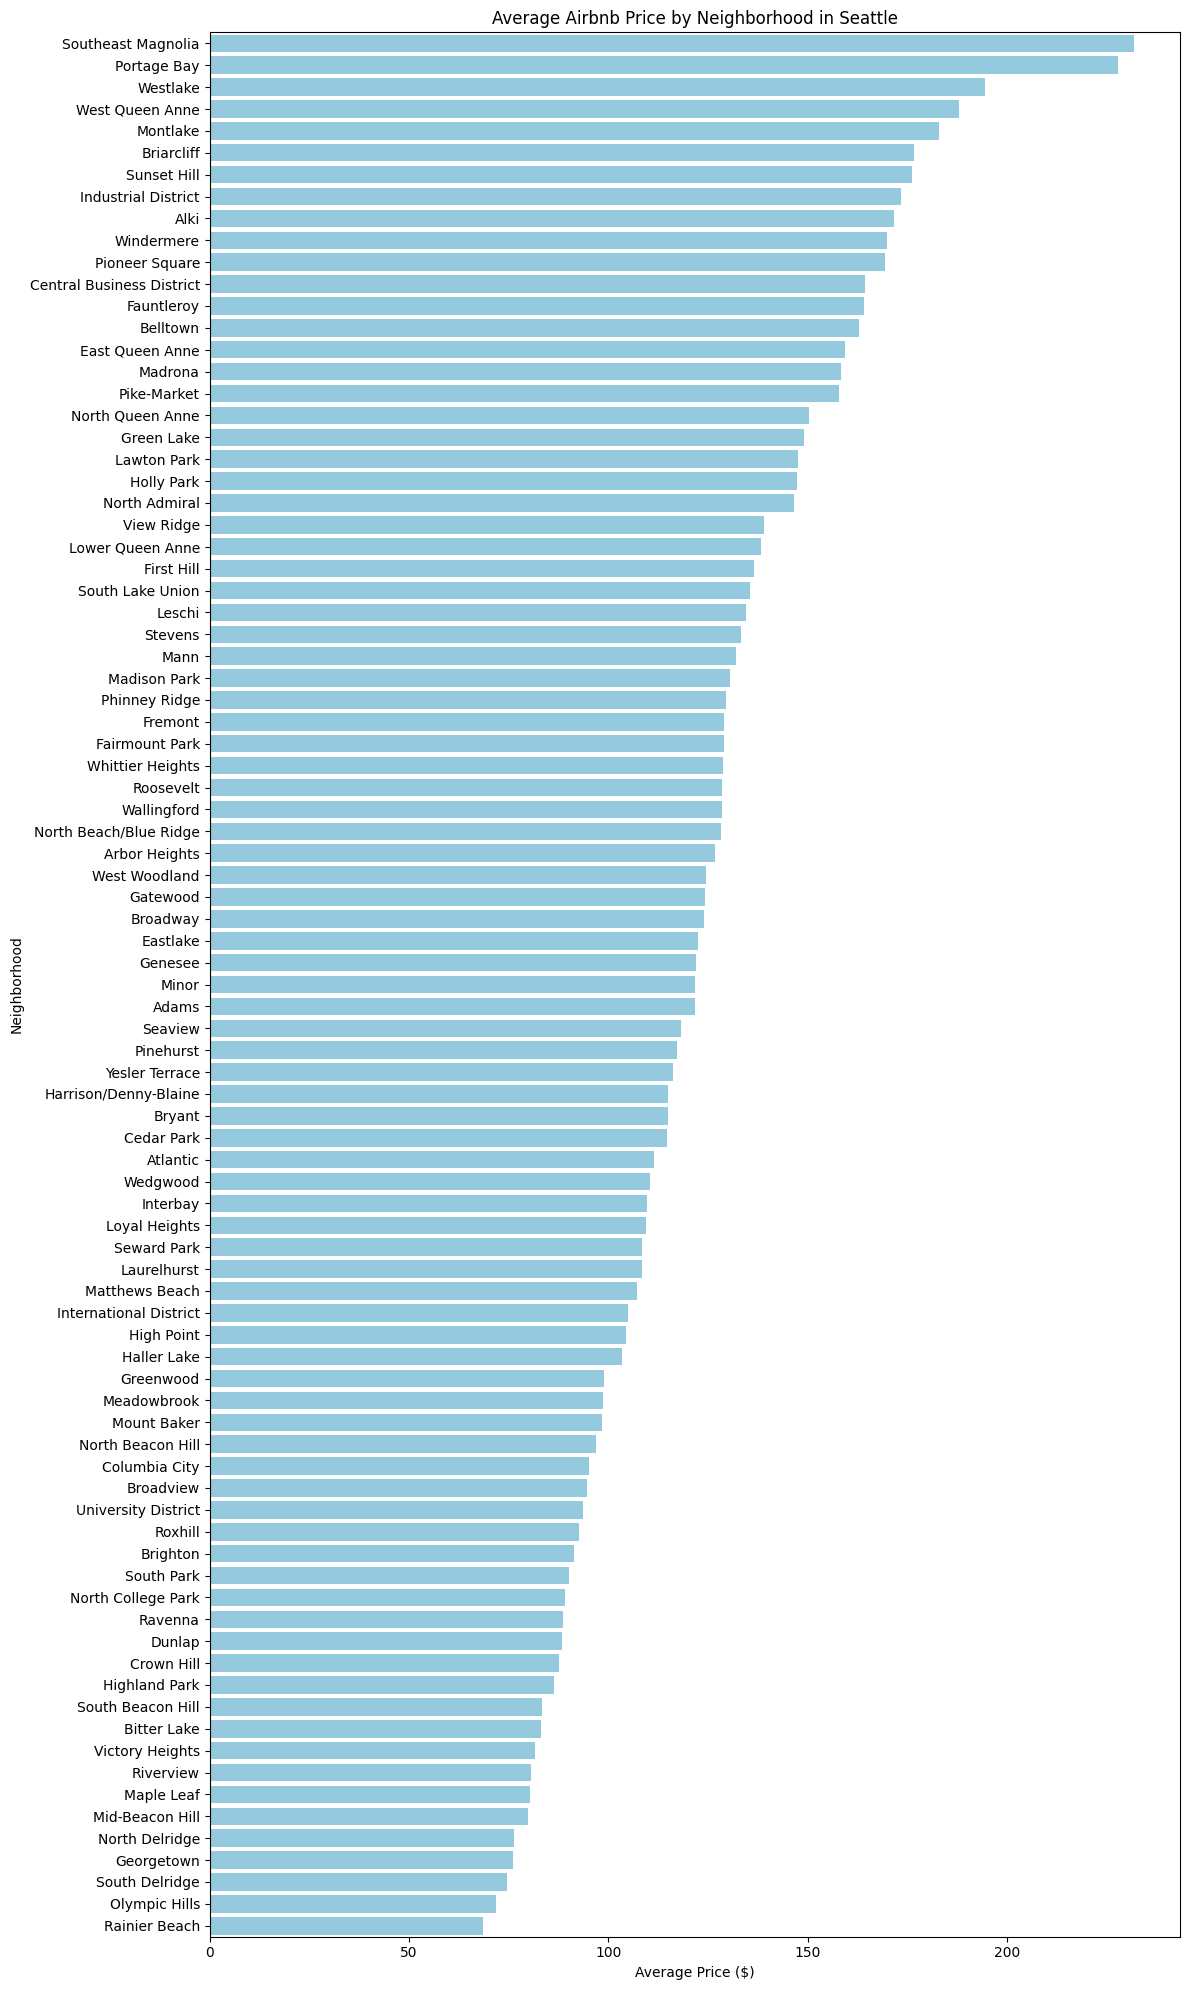

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('listings.csv')

# Clean the price column
df['price'] = df['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Q1: What is the average Airbnb price in different neighborhoods of Seattle?
neighborhood_avg_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 20))
sns.barplot(x=neighborhood_avg_price.values, y=neighborhood_avg_price.index, color='skyblue')
plt.title('Average Airbnb Price by Neighborhood in Seattle')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

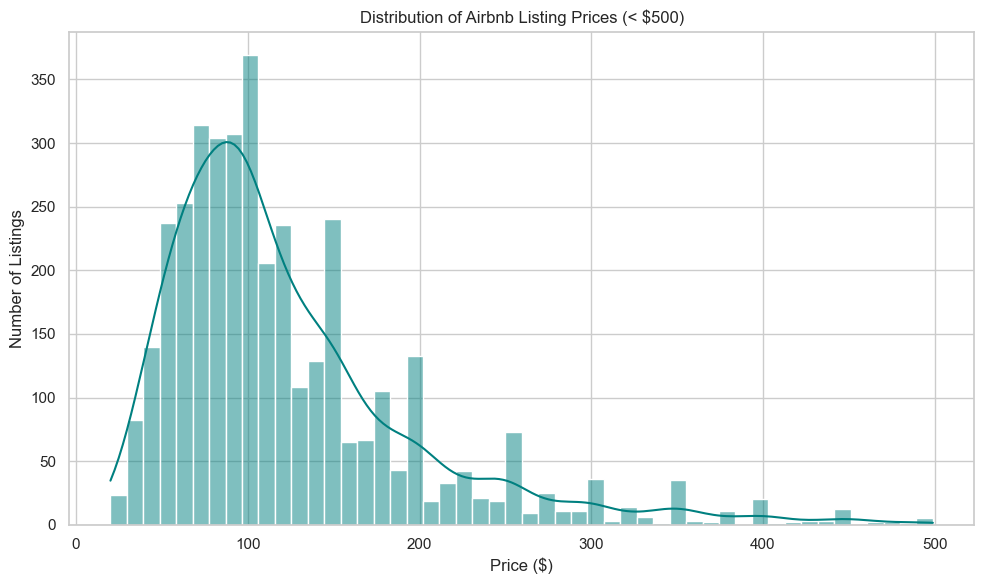

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Filter out very high prices to avoid skewing the distribution
df_filtered = df[df['price'] < 500]  # You can adjust this threshold if needed

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], bins=50, kde=True, color='teal')
plt.title('Distribution of Airbnb Listing Prices (< $500)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

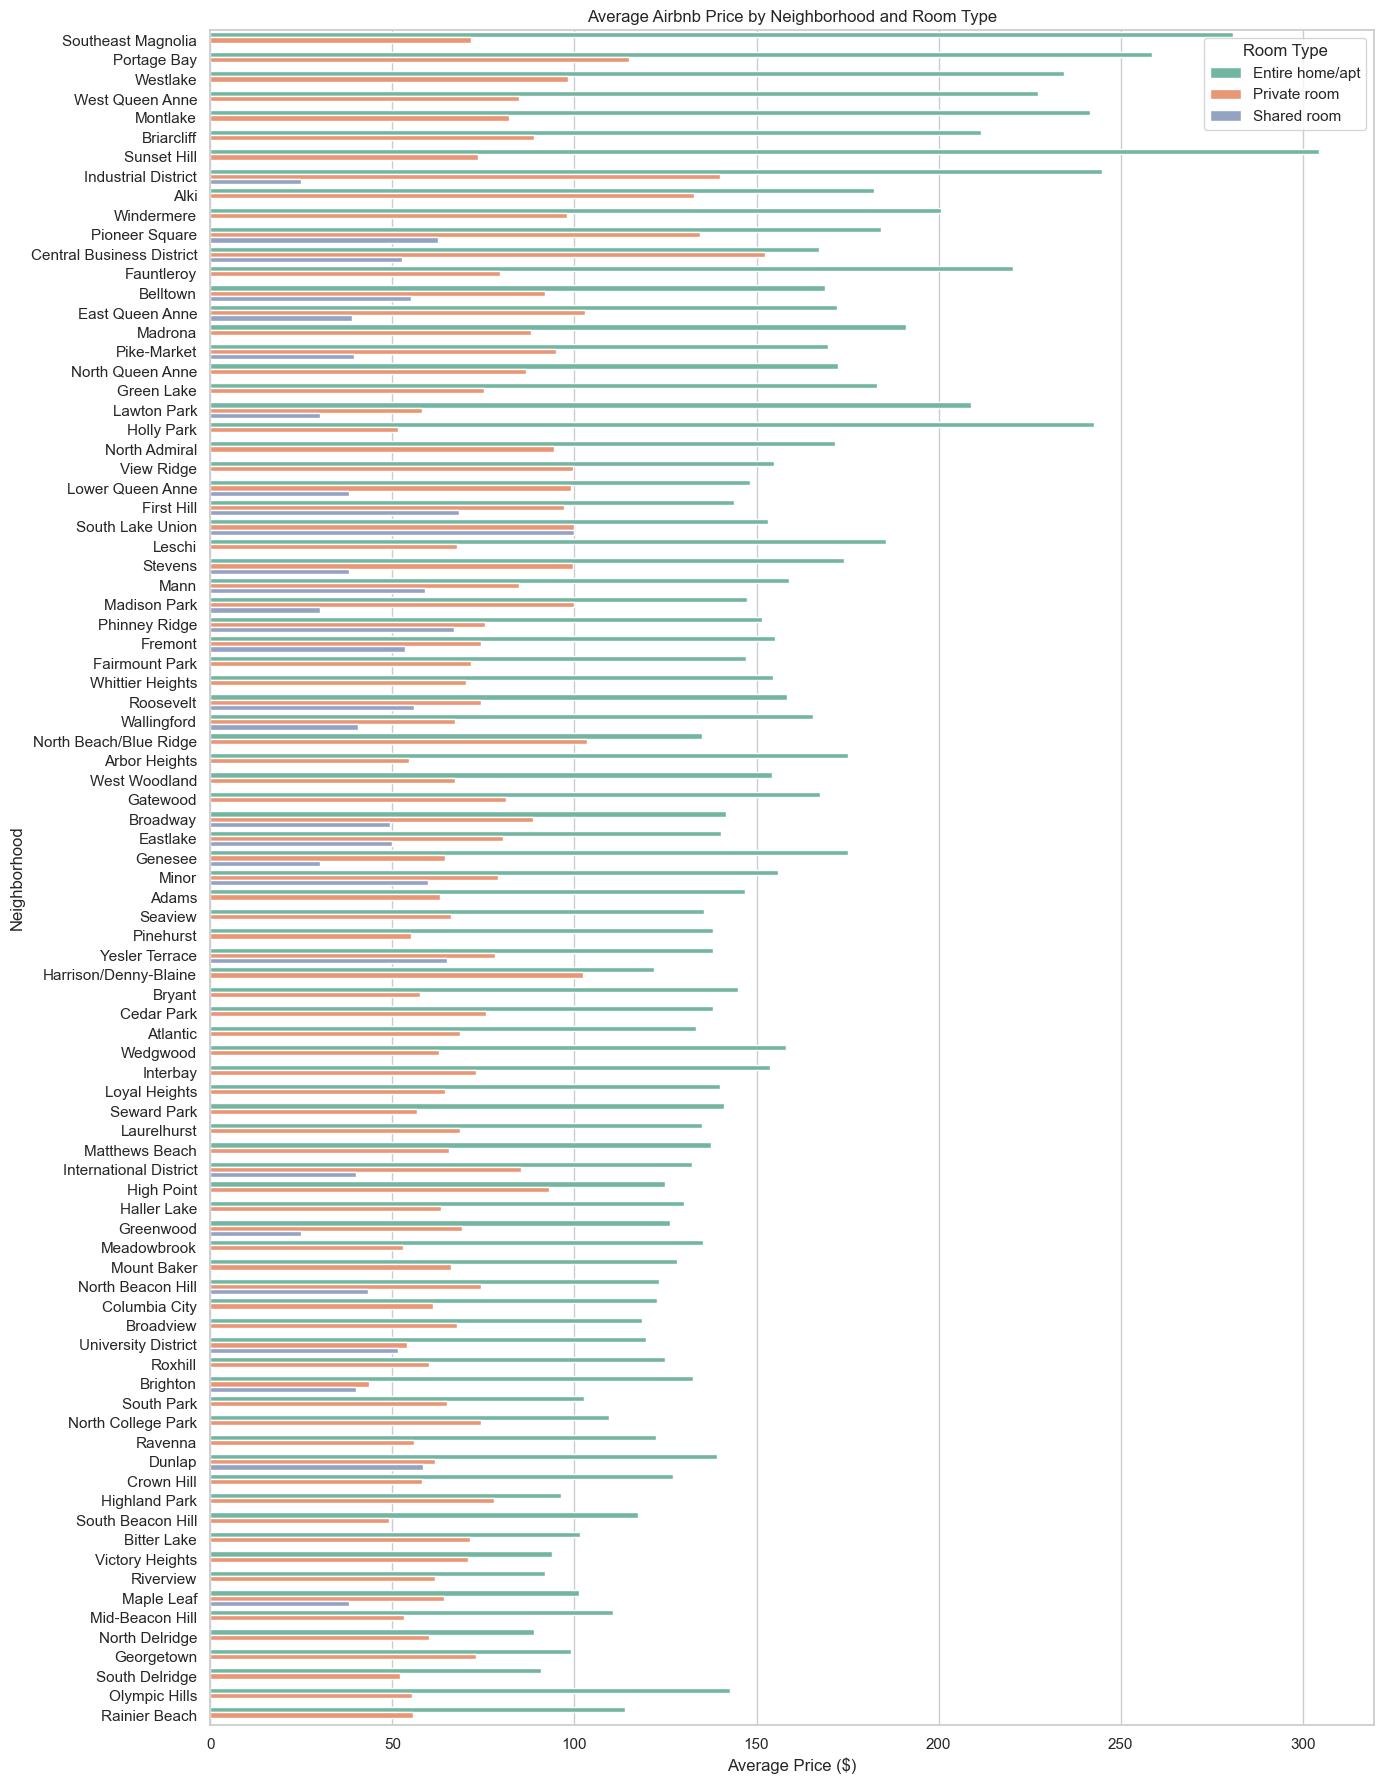

In [14]:
# Group data by neighborhood and room type, compute mean price
grouped = df.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().reset_index()

# Sort neighborhoods by overall average price to keep plot consistent
neighborhood_order = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(14, 18))
sns.barplot(
    data=grouped,
    x='price',
    y='neighbourhood_cleansed',
    hue='room_type',
    order=neighborhood_order,
    palette='Set2'
)

plt.title('Average Airbnb Price by Neighborhood and Room Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

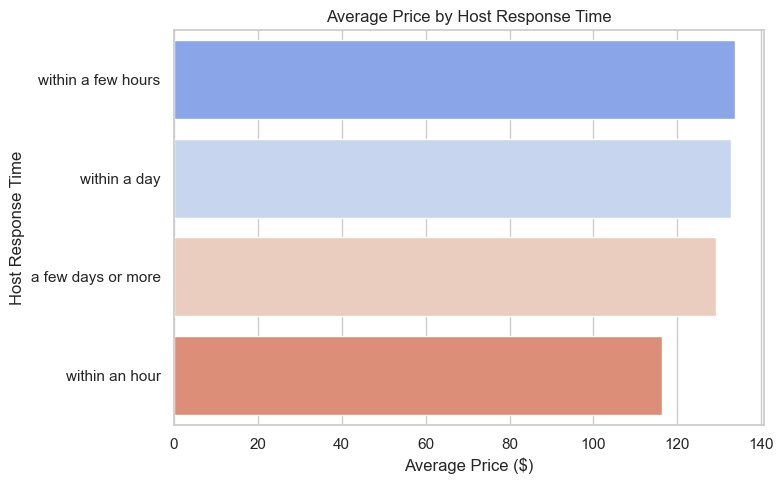

In [18]:
# Future-proof version of the Q4 plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=response_price.values,
    y=response_price.index,
    hue=response_price.index,   # Add hue to remove the deprecation warning
    dodge=False,                # Prevent overlapping
    palette="coolwarm",
    legend=False                # Disable the legend since hue is used only for coloring
)
plt.title('Average Price by Host Response Time')
plt.xlabel('Average Price ($)')
plt.ylabel('Host Response Time')
plt.tight_layout()
plt.show()

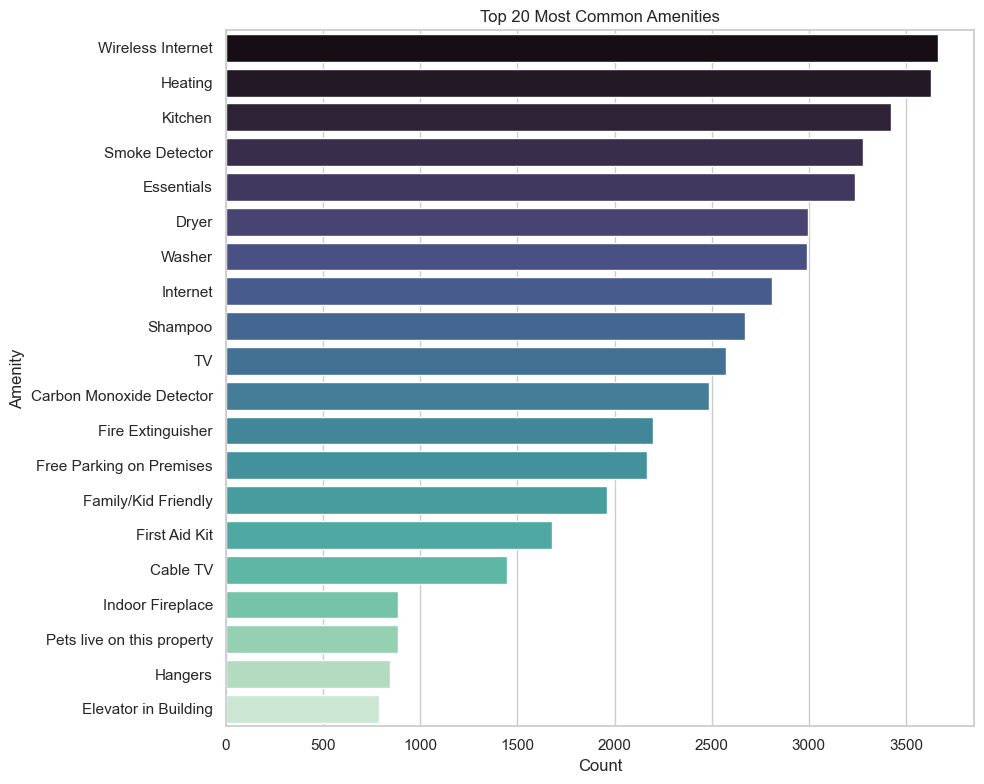

In [19]:
# Updated bar plot for top 20 amenities
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Count',
    y='Amenity',
    data=amenities_df,
    hue='Amenity',           # Assign hue to satisfy future versions
    dodge=False,             # Prevent overlapping
    palette='mako',
    legend=False             # Disable legend since hue is just for coloring
)
plt.title('Top 20 Most Common Amenities')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.tight_layout()
plt.show()